<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

You have an equity portfolio that has a payoff structure shown in this excel file "Test 1 Portfolio Surgery.xlsx" Preview the document  

The payoff is dependent on the SPY index on which many options are available. Use both call and put options to reduce the negative payoffs as best as possible. Use options with strikes from USD 100 to 390 with increments of 10.

Upload your code (Python, Matlab, R, C, or any other) and also a picture that shows the payoffs before and after surgery. You may use the code (Matlab and Python) available on canvas and adapt it suitably.

In [1]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

In [2]:
# stock is the possible stock price space
stock = np.arange(1,401)

In [3]:
# Then call and put are the possible call and put payments space
call = np.maximum(stock - np.transpose([10*np.arange(10,40)]), 0)
put = np.maximum(-stock + np.transpose([10*np.arange(10,40)]), 0)

In [4]:
various_strikes = np.transpose([10*np.arange(10,40)])
various_strikes

array([[100],
       [110],
       [120],
       [130],
       [140],
       [150],
       [160],
       [170],
       [180],
       [190],
       [200],
       [210],
       [220],
       [230],
       [240],
       [250],
       [260],
       [270],
       [280],
       [290],
       [300],
       [310],
       [320],
       [330],
       [340],
       [350],
       [360],
       [370],
       [380],
       [390]])

In [5]:
call

array([[  0,   0,   0, ..., 298, 299, 300],
       [  0,   0,   0, ..., 288, 289, 290],
       [  0,   0,   0, ..., 278, 279, 280],
       ...,
       [  0,   0,   0, ...,  28,  29,  30],
       [  0,   0,   0, ...,  18,  19,  20],
       [  0,   0,   0, ...,   8,   9,  10]])

In [6]:
put

array([[ 99,  98,  97, ...,   0,   0,   0],
       [109, 108, 107, ...,   0,   0,   0],
       [119, 118, 117, ...,   0,   0,   0],
       ...,
       [369, 368, 367, ...,   0,   0,   0],
       [379, 378, 377, ...,   0,   0,   0],
       [389, 388, 387, ...,   0,   0,   0]])

In [7]:
# import portfolio data
# use your own file path to replace
file_path = r"Test 1 Portfolio Surgery.xlsx"
portfolio_dataframe = pd.read_excel(file_path)
portfolio = portfolio_dataframe

In [8]:
portfolio

,SPY,portfolio Payoff
0,1,5890599000
1,2,5782392000
2,3,5675373000
3,4,5569536000
4,5,5464875000
...,...,...
395,396,-5569536000
396,397,-5675373000
397,398,-5782392000
398,399,-5890599000


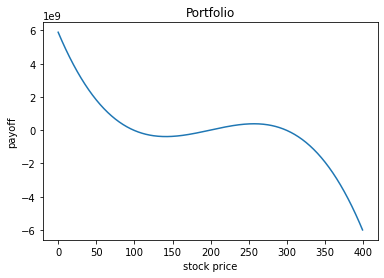

In [9]:
plt.plot(portfolio['portfolio Payoff'])
plt.title('Portfolio')
plt.xlabel('stock price')
plt.ylabel('payoff')
plt.show()

In [10]:
# plot call and put
call, put = np.transpose(call), np.transpose(put)

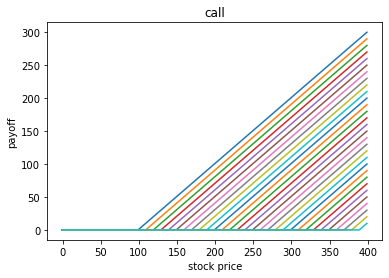

In [11]:
# Call options payoff
plt.plot(call)
plt.title('call')
plt.xlabel('stock price')
plt.ylabel('payoff')
plt.show()

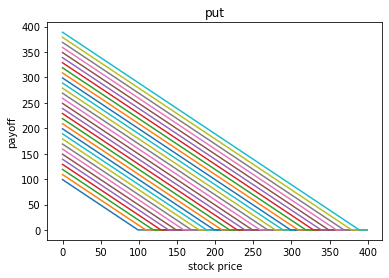

In [12]:
# Put options payoff
plt.plot(put)
plt.title('put')
plt.xlabel('stock price')
plt.ylabel('payoff')
plt.show()

In [13]:
# x is the independent variable, axis = 1 means concat 
x = np.concatenate((call, put), axis=1)

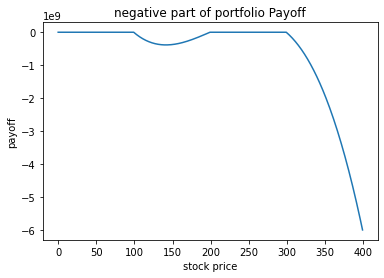

In [14]:
negative_portfolio1 = np.minimum(portfolio['portfolio Payoff'], 0)
plt.plot(negative_portfolio1)
plt.title("negative part of portfolio Payoff")
plt.xlabel('stock price')
plt.ylabel('payoff')
plt.show()

Text(0.5, 1.0, 'Regression coefficient')

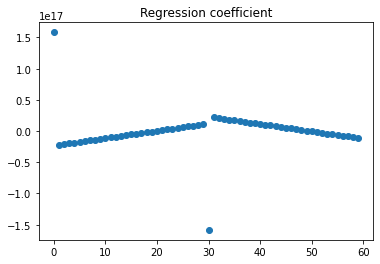

In [15]:
model = LinearRegression(fit_intercept=False)
beta = model.fit(x, negative_portfolio1.values).coef_
plt.scatter(list(range(len(beta))), beta)
plt.title('Regression coefficient')

In [16]:
aftersurgery = negative_portfolio1 - np.dot(x,beta)
aftersurgery1 = portfolio_dataframe['portfolio Payoff'] - np.dot(x,beta)

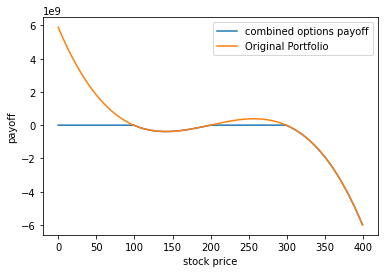

In [17]:
# Plot demonstrates the fit of the options for portfolio surgery

option_payoff = np.dot(x,beta)
plt.xlabel('stock price')
plt.ylabel('payoff')
plt.plot(option_payoff)
plt.plot(portfolio_dataframe['portfolio Payoff'])
plt.legend(["combined options payoff","Original Portfolio"])
plt.show()

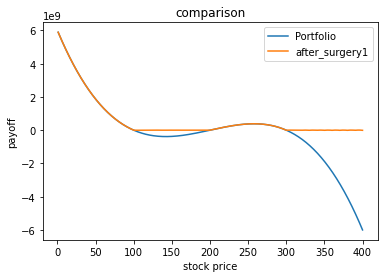

In [18]:
# Plot demonstrates the final portfolio after surgery (i.e. we neutralise the 
# downside and keep the upside of the portfolio)

plt.plot(stock,portfolio['portfolio Payoff'])
plt.plot(stock, aftersurgery1)
plt.xlabel('stock price')
plt.ylabel('payoff')
plt.legend(["Portfolio","after_surgery1"])
plt.title("comparison")
plt.show()

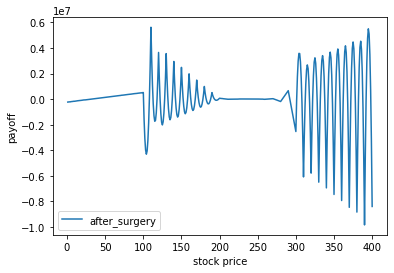

In [19]:
plt.plot(stock, aftersurgery)
plt.xlabel('stock price')
plt.ylabel('payoff')
plt.legend(["after_surgery"])
plt.show()